## 과소완전 오토인코더

### 선형 오토인코더로 PCA 수행하기
* 오토인코더 : 선형 활성화 함수만 사용, 비용 함수가 MSE라면, 결국 주성분 분석(PCA)를 수행하는 것이다.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

C:\Users\knuyh\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# 3D 데이터셋에 PCA 적용해 2D에 투영하는 선형 오토인코더
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])
autoencoder = keras.models.Sequential([encoder, decoder]) # autoencoder : 인코더 다음에 디코더가 뒤따르는 Sequential 모델
# 출력 개수 = 입력 개수

autoencoder.compile(loss = 'mse', optimizer = keras.optimizers.SGD(learning_rate=0.1))

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [3]:
def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(60)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

In [4]:
history = autoencoder.fit(X_train, X_train, epochs=20)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.3236 
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2658 
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.2110 
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1848
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1657 
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.1421 
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.1348
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1222 
Epoch 9/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1085  
Epoch 10/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1032 
Epoch 11/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0968  
Epoch 12/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0929 
Epoch 13/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0827 
Epoch 14/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0773 
Epoch 15/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0707 
Epoch 16/20
2/2 ━━━━━━━━━━━━━━━

In [5]:
codings = encoder.predict(X_train)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


### 적층 오토인코더
* 여러 개 은닉층을 가지는 오토인코더

In [46]:
# MNIST
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

In [47]:
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape = [28, 28]),
    keras.layers.Dense(100, activation='selu'),
    keras.layers.Dense(30, activation='selu')
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation = 'selu', input_shape=[30]),
    keras.layers.Dense(28 * 28, activation = 'sigmoid'),
    keras.layers.Reshape([28, 28])
])
stacked_ae = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_ae.compile(loss = 'binary_crossentropy', # MSE가 아닌 이진 (재구성)
                  optimizer = keras.optimizers.SGD(learning_rate=1.5))

history = stacked_ae.fit(X_train, X_train, epochs=10,
                        validation_data = (X_valid, X_valid))

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - loss: 0.3771 - val_loss: 0.3127
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.3073 - val_loss: 0.3030
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2993 - val_loss: 0.2980
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.2946 - val_loss: 0.2939
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2915 - val_loss: 0.2917
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2894 - val_loss: 0.2898
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2877 - val_loss: 0.2887
Epoch 8/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2865 - val_loss: 0.2879
Epoch 9/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2854 - val_loss: 0.2870
Epoch 10/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2846 - val_loss: 0.2863


In [48]:
def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))

In [49]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

In [50]:
import matplotlib.pyplot as plt
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 160ms/step


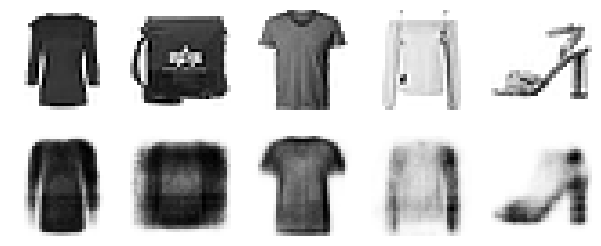

In [51]:
show_reconstructions(stacked_ae)
# 위 : 원본 이미지, 아래 : 재구성 -> 정보 잃음

In [52]:
from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


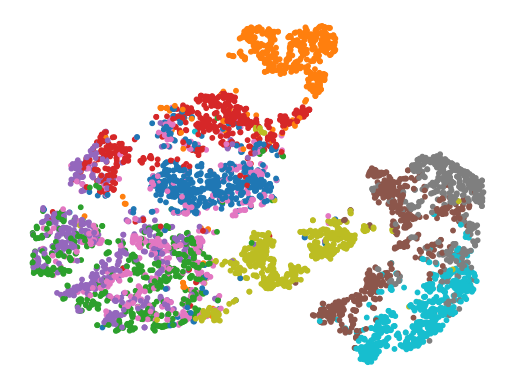

In [53]:
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap="tab10")
plt.axis("off")
plt.show()

In [57]:
# 가중치 묶기 : 오토인코더가 대칭일 땐, 디코더의 가중치와 인코더의 가중치 묶기
# 가중치 수 절반으로 줄어 훈련 속도 높이고, 과대적합 위험 줄임
class DenseTranspose(keras.layers.Layer):
    def __init__(self, dense, activation=None, **kwargs):
        self.dense = dense
        self.activation = keras.activations.get(activation)
        super().__init__(**kwargs)
    def build(self, batch_input_shape):
        self.biases = self.add_weight(name="bias",
                                      initializer="zeros",
                                      shape=[self.dense.input_shape[-1]]
                                      )
        super().build(batch_input_shape)
    def call(self, inputs):
        z = tf.matmul(inputs, self.dense.weights[0], transpose_b=True)
        return self.activation(z + self.biases)

In [58]:
X_train.shape

(55000, 28, 28)

In [59]:
dense_1 = keras.layers.Dense(100, activation="selu")
dense_2 = keras.layers.Dense(30, activation="selu")

tied_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    dense_1,
    dense_2
])

tied_decoder = keras.models.Sequential([
    DenseTranspose(dense_2, activation="selu"),
    DenseTranspose(dense_1, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

tied_ae = keras.models.Sequential([tied_encoder, tied_decoder])

tied_ae.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(learning_rate=1.5), metrics=[rounded_accuracy])
history = tied_ae.fit(X_train, X_train, epochs=10,
                      validation_data=(X_valid, X_valid))

Epoch 1/10


AttributeError: 'Dense' object has no attribute 'input_shape'

In [ ]:
show_reconstructions(tied_ae)
plt.show()

In [60]:
# 한번에 하나의 오토인코더 훈련하기
def train_autoencoder(n_neurons, X_train, X_valid, loss, optimizer,
                      n_epochs=10, output_activation=None, metrics=None):
    n_inputs = X_train.shape[-1]
    encoder = keras.models.Sequential([
        keras.layers.Dense(n_neurons, activation="selu", input_shape=[n_inputs])
    ])
    decoder = keras.models.Sequential([
        keras.layers.Dense(n_inputs, activation=output_activation),
    ])
    autoencoder = keras.models.Sequential([encoder, decoder])
    autoencoder.compile(optimizer, loss, metrics=metrics)
    autoencoder.fit(X_train, X_train, epochs=n_epochs,
                    validation_data=(X_valid, X_valid))
    return encoder, decoder, encoder(X_train), encoder(X_valid)

In [61]:
K = keras.backend
X_train_flat = K.batch_flatten(X_train) # equivalent to .reshape(-1, 28 * 28)
X_valid_flat = K.batch_flatten(X_valid)
enc1, dec1, X_train_enc1, X_valid_enc1 = train_autoencoder(
    100, X_train_flat, X_valid_flat, "binary_crossentropy",
    keras.optimizers.SGD(learning_rate=1.5), output_activation="sigmoid",
    metrics=[rounded_accuracy])
enc2, dec2, _, _ = train_autoencoder(
    30, X_train_enc1, X_valid_enc1, "mse", keras.optimizers.SGD(learning_rate=0.05),
    output_activation="selu")

Epoch 1/10


C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3968 - rounded_accuracy: 0.8447 - val_loss: 0.3112 - val_rounded_accuracy: 0.9159
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.3054 - rounded_accuracy: 0.9189 - val_loss: 0.2994 - val_rounded_accuracy: 0.9260
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2953 - rounded_accuracy: 0.9279 - val_loss: 0.2924 - val_rounded_accuracy: 0.9325
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2891 - rounded_accuracy: 0.9338 - val_loss: 0.2880 - val_rounded_accuracy: 0.9368
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2851 - rounded_accuracy: 0.9377 - val_loss: 0.2849 - val_rounded_accuracy: 0.9397
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2822 - rounded_accuracy: 0.9404 - val_loss: 0.2826 - val_rounded_accuracy: 0.9420
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.2801 - rounded_accuracy: 0.9425 - val_loss: 0.2809 - val_rounded_accura

In [62]:
stacked_ae_1_by_1 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    enc1, enc2, dec2, dec1,
    keras.layers.Reshape([28, 28])
])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


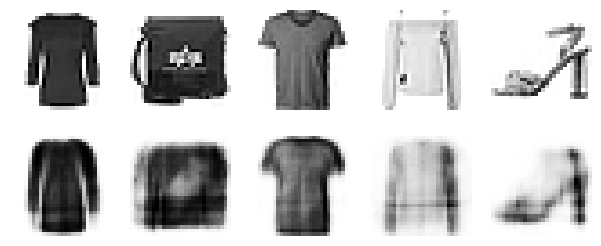

In [63]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

In [64]:
stacked_ae_1_by_1.compile(loss="binary_crossentropy",
                          optimizer=keras.optimizers.SGD(learning_rate=0.1), metrics=[rounded_accuracy])
history = stacked_ae_1_by_1.fit(X_train, X_train, epochs=10,
                                validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 0.2857 - rounded_accuracy: 0.9348 - val_loss: 0.2873 - val_rounded_accuracy: 0.9353
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.2852 - rounded_accuracy: 0.9355 - val_loss: 0.2870 - val_rounded_accuracy: 0.9356
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2849 - rounded_accuracy: 0.9357 - val_loss: 0.2868 - val_rounded_accuracy: 0.9359
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2846 - rounded_accuracy: 0.9360 - val_loss: 0.2866 - val_rounded_accuracy: 0.9361
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2844 - rounded_accuracy: 0.9362 - val_loss: 0.2864 - val_rounded_accuracy: 0.9362
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - loss: 0.2843 - rounded_accuracy: 0.9363 - val_loss: 0.2863 - val_rounded_accuracy: 0.9364
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 0.2841 - rounded_accuracy: 0.9365 - val_loss: 0.2861 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


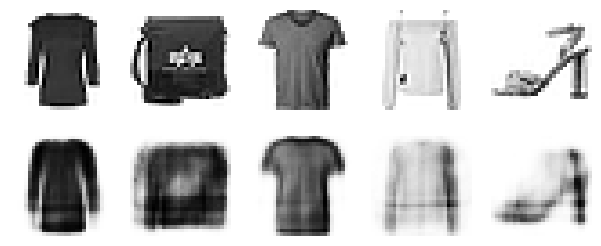

In [65]:
show_reconstructions(stacked_ae_1_by_1)
plt.show()

### 합성곱 오토인코더
* 인코더 = 합성곱 층 + 풀링 층
* 인코더는 입력에서 공간 방향의 차원(높이와 너비)을 줄이고, 깊이(특성 맵의 개수)를 늘린다.
* 디코더는 거꾸로 동작, 이미지 스케일 늘리고, 깊이를 원본 차원으로 되돌려야  
=> 전치 합성곱 층(합성곱 층 + 업샘플링 층)

In [66]:
conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
conv_ae = keras.models.Sequential([conv_encoder, conv_decoder])

conv_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                metrics=[rounded_accuracy])
history = conv_ae.fit(X_train, X_train, epochs=5,
                      validation_data=(X_valid, X_valid))

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\reshape.py:39: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv_transpose.py:94: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 18ms/step - loss: 0.3375 - rounded_accuracy: 0.8904 - val_loss: 0.2824 - val_rounded_accuracy: 0.9331
Epoch 2/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 35s 20ms/step - loss: 0.2774 - rounded_accuracy: 0.9395 - val_loss: 0.2741 - val_rounded_accuracy: 0.9440
Epoch 3/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 25s 15ms/step - loss: 0.2717 - rounded_accuracy: 0.9451 - val_loss: 0.2714 - val_rounded_accuracy: 0.9467
Epoch 4/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 30s 17ms/step - loss: 0.2687 - rounded_accuracy: 0.9480 - val_loss: 0.2692 - val_rounded_accuracy: 0.9491
Epoch 5/5
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 33s 19ms/step - loss: 0.2668 - rounded_accuracy: 0.9500 - val_loss: 0.2676 - val_rounded_accuracy: 0.9506


In [67]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ reshape_6 (Reshape)                  │ (None, 28, 28, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 28, 28, 16)          │             160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 7, 7, 64)            │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 3, 3, 64)            │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,296 (91.00 KB)

 Trainable params: 23,296 (91.00 KB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_23"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 32)            │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │             145 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_7 (Reshape)                  │ (None, 28, 28)              │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,233 (90.75 KB)

 Trainable params: 23,233 (90.75 KB)

 Non-trainable params: 0 (0.00 B)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step


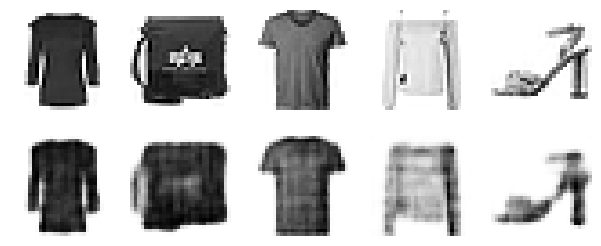

In [68]:
show_reconstructions(conv_ae)
plt.show()

### 순환 오토인코더
* 인코더는 입력 시퀀스를 하나의 벡터로 압축하는 시퀀스-투-벡터 RNN
* 디코더는 반대로 벡터-투-시퀀스 RNN
* 타임 스텝마다 28차원을 갖는 어떤 길이의 시퀀스로 처리할 수 있다.
* 타임 스텝마다 입력 벡터를 주입하기 위해 디코더의 첫 번째 층에 RepeatVector 층 사용

In [69]:
recurrent_encoder = keras.models.Sequential([
    keras.layers.LSTM(100, return_sequences=True, input_shape=[28, 28]),
    keras.layers.LSTM(30)
])
recurrent_decoder = keras.models.Sequential([
    keras.layers.RepeatVector(28, input_shape=[30]),
    keras.layers.LSTM(100, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(28, activation="sigmoid"))
])
recurrent_ae = keras.models.Sequential([recurrent_encoder, recurrent_decoder])
recurrent_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(0.1),
                     metrics=[rounded_accuracy])

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\reshaping\repeat_vector.py:29: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [70]:
history = recurrent_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 107s 58ms/step - loss: 0.5647 - rounded_accuracy: 0.6979 - val_loss: 0.4613 - val_rounded_accuracy: 0.8088
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 95s 55ms/step - loss: 0.4289 - rounded_accuracy: 0.8235 - val_loss: 0.3781 - val_rounded_accuracy: 0.8594
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 96s 56ms/step - loss: 0.3728 - rounded_accuracy: 0.8633 - val_loss: 0.3633 - val_rounded_accuracy: 0.8767
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - loss: 0.3554 - rounded_accuracy: 0.8771 - val_loss: 0.3458 - val_rounded_accuracy: 0.8860
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 81s 47ms/step - loss: 0.3434 - rounded_accuracy: 0.8852 - val_loss: 0.3411 - val_rounded_accuracy: 0.8881
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 78s 45ms/step - loss: 0.3338 - rounded_accuracy: 0.8920 - val_loss: 0.3324 - val_rounded_accuracy: 0.8946
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 73s 42ms/step - loss: 0.3276 - rounded_accuracy: 0.8965 - val_loss: 0

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


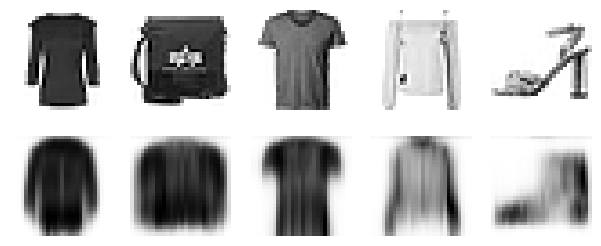

In [71]:
show_reconstructions(recurrent_ae)
plt.show()

## 과대완전 오토인코더

### 잡음 제거 오토인코더

In [72]:
# 가우시안 잡음
denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = denoising_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.4020 - rounded_accuracy: 0.8314 - val_loss: 0.3204 - val_rounded_accuracy: 0.9016
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3153 - rounded_accuracy: 0.9067 - val_loss: 0.3115 - val_rounded_accuracy: 0.9085
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3079 - rounded_accuracy: 0.9128 - val_loss: 0.3049 - val_rounded_accuracy: 0.9162
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3033 - rounded_accuracy: 0.9168 - val_loss: 0.3001 - val_rounded_accuracy: 0.9214
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2997 - rounded_accuracy: 0.9201 - val_loss: 0.2972 - val_rounded_accuracy: 0.9250
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.2972 - rounded_accuracy: 0.9223 - val_loss: 0.2953 - val_rounded_accuracy: 0.9259
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.2955 - rounded_accuracy: 0.9235 - val_loss: 0.2939 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step


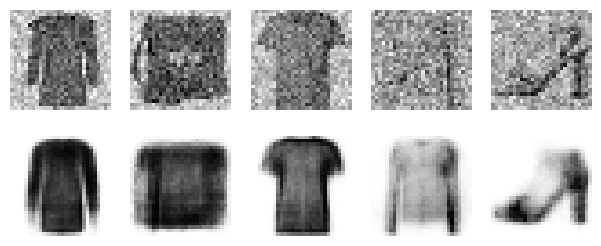

In [73]:
noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()
# 위 : 잡음 섞인 이미지, 아래 : 재구성된 이미지

In [74]:
# 드롭아웃
dropout_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
dropout_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
dropout_ae = keras.models.Sequential([dropout_encoder, dropout_decoder])
dropout_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                   metrics=[rounded_accuracy])
history = dropout_ae.fit(X_train, X_train, epochs=10,
                         validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4049 - rounded_accuracy: 0.8282 - val_loss: 0.3190 - val_rounded_accuracy: 0.9074
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3188 - rounded_accuracy: 0.9024 - val_loss: 0.3140 - val_rounded_accuracy: 0.9118
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3123 - rounded_accuracy: 0.9076 - val_loss: 0.3065 - val_rounded_accuracy: 0.9170
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3082 - rounded_accuracy: 0.9111 - val_loss: 0.3027 - val_rounded_accuracy: 0.9200
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3054 - rounded_accuracy: 0.9134 - val_loss: 0.3002 - val_rounded_accuracy: 0.9216
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3035 - rounded_accuracy: 0.9150 - val_loss: 0.2987 - val_rounded_accuracy: 0.9210
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3020 - rounded_accuracy: 0.9161 - val_loss: 0.2981 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step


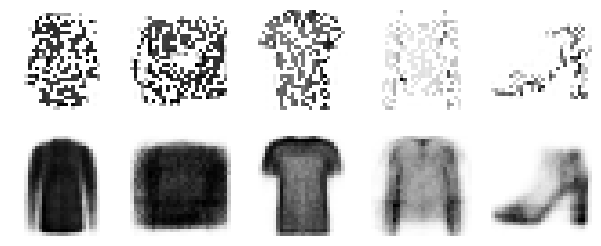

In [75]:
dropout = keras.layers.Dropout(0.5)
show_reconstructions(dropout_ae, dropout(X_valid, training=True))
# 위 : 잡음 섞인 이미지, 아래 : 재구성된 이미지

### 희소 오토인코더
* L1 규제는 L2보다 모든 코딩을 감소시키는 대신 입력 이미지에서 불필요한 것을 제거하고, 가장 중요한 코딩을 보전하도록 만든다.

In [79]:
sparse_l1_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid"),
    keras.layers.ActivityRegularization(l1=1e-3)  # L1 규제 / 입력을 그대로 반환하면서 훈련 손실 + sum(|입력|)
]) # activity_regularizer = keras.regularizers.l1(1e-3)

sparse_l1_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_l1_ae = keras.models.Sequential([sparse_l1_encoder, sparse_l1_decoder])
sparse_l1_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=[rounded_accuracy])
history = sparse_l1_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6181 - rounded_accuracy: 0.7126 - val_loss: 0.4934 - val_rounded_accuracy: 0.7289
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4902 - rounded_accuracy: 0.7317 - val_loss: 0.4929 - val_rounded_accuracy: 0.7289
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4899 - rounded_accuracy: 0.7317 - val_loss: 0.4928 - val_rounded_accuracy: 0.7289
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4898 - rounded_accuracy: 0.7317 - val_loss: 0.4927 - val_rounded_accuracy: 0.7289
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4898 - rounded_accuracy: 0.7317 - val_loss: 0.4927 - val_rounded_accuracy: 0.7289
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4897 - rounded_accuracy: 0.7317 - val_loss: 0.4927 - val_rounded_accuracy: 0.7289
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.4897 - rounded_accuracy: 0.7317 - val_loss: 0.4927 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


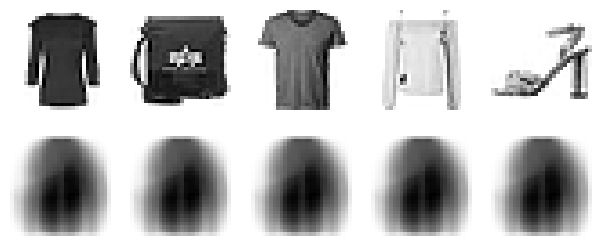

In [80]:
show_reconstructions(sparse_l1_ae)
plt.show()

In [81]:
# KL 발산 규제
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [82]:
# 코딩층의 활성화에 희소 오토인코더 생성
kld_reg = KLDivergenceRegularizer(weight=0.05, target=0.1)
sparse_kl_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(300, activation="sigmoid", activity_regularizer=kld_reg)
])
sparse_kl_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[300]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
sparse_kl_ae = keras.models.Sequential([sparse_kl_encoder, sparse_kl_decoder])
sparse_kl_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0),
              metrics=[rounded_accuracy])
history = sparse_kl_ae.fit(X_train, X_train, epochs=10,
                           validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.6425 - rounded_accuracy: 0.7356 - val_loss: 0.4544 - val_rounded_accuracy: 0.8045
Epoch 2/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3987 - rounded_accuracy: 0.8381 - val_loss: 0.4140 - val_rounded_accuracy: 0.8235
Epoch 3/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3819 - rounded_accuracy: 0.8540 - val_loss: 0.3968 - val_rounded_accuracy: 0.8361
Epoch 4/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3645 - rounded_accuracy: 0.8751 - val_loss: 0.3826 - val_rounded_accuracy: 0.8421
Epoch 5/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3532 - rounded_accuracy: 0.8836 - val_loss: 0.3736 - val_rounded_accuracy: 0.8480
Epoch 6/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.3441 - rounded_accuracy: 0.8914 - val_loss: 0.3620 - val_rounded_accuracy: 0.8606
Epoch 7/10
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.3367 - rounded_accuracy: 0.8968 - val_loss: 0.3554 - val_rou

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


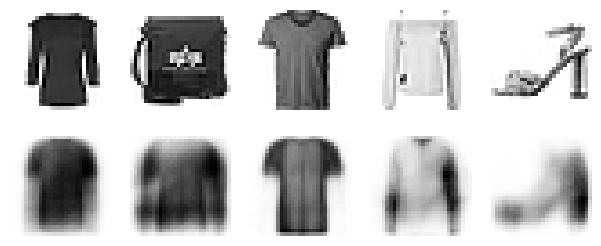

In [83]:
show_reconstructions(sparse_kl_ae)
# 코딩 층에 있는 뉴런의 활성화가 거의 0에 가까워짐
# 전체 뉴런의 평균 활성화가 0.1 근처

### 변이형 오토인코더
* 확률적 오토인코더 : 훈련이 끝난 후에도 출력이 부분적으로 우연에 의해 결정된다. (이와는 반대로 잡음 제거 오토인코더는 훈련 시에만 무작위성 사용)
* 생성 오토인코더 : 훈련 셋에서 샘플링된 것 같은 새로운 샘플 생성 가능

<br>

* 주어진 입력에 대한 코딩을 바로 만드는 대신, 인코더는 평균 코딩 mu와 표준편차를 만든다. 
* 실제 코딩은 평균이 mu이고 표준편차가 sigma인 **가우시안 분포**에서 랜덤하게 샘플링된다.
* 그 후, 디코더가 샘플링된 코딩을 디코딩

<br>

* 비용함수
    * 오토인코더가 입력을 재생산하도록 만드는 일반적인 재구성 손실
    * 단순한 가우시안 분포에서 샘플된 것 같은 코딩을 가지도록 오토인코더를 강제하는 잠재 손실 -> 목표 분포(가우시안)와 실제 코딩 분포 사이의 KL 발산 사용

In [89]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean 

In [90]:
# 인코더 ; 함수형 API 사용
codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z) # mu
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var]) # 마지막 출력
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

In [91]:
# 디코더 ; 시퀀셜 API 사용
decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

In [92]:
# 변이형 오토인코더 모델
_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

In [ ]:
# 인코더의 처음 두개 출력 무시하고, 코딩만 디코더에 주입
# 잠재손실과 재구성 손실 추가
from tensorflow.keras import backend as K

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=[rounded_accuracy])
history = variational_ae.fit(X_train, X_train, epochs=25, batch_size=128,
                             validation_data=(X_valid, X_valid))

* MNIST

In [99]:
codings = tf.random.normal(shape=[12, codings_size])
images = variational_decoder(codings).numpy()

In [102]:
# 시맨틱 보간 가능 : 두 이미지가 겹쳐 보이는 것 같은 픽셀 수준의 보간 대신 코딩 수준에서 두 이미지 보간 가능
codings_grid = tf.reshape(codings, [1, 3, 4, codings_size])
larger_grid = tf.image.resize(codings_grid, size=[5, 7])
interpolated_codings = tf.reshape(larger_grid, [-1, codings_size])
images = variational_decoder(interpolated_codings).numpy()

### 생성적 적대 신경망
* 첫 번째 단계 ) 판별자 훈련
    * 훈련셋에서 실제 이미지 배치를 샘플링하고, 생성자에서 생성한 동일한 수의 가짜 이미지 합침 (가짜이미지 0, 진짜이미지 1)
    * 역전파는 판별자의 가중치만 최적화
* 두 번째 단계 ) 생성자 훈련
    * 생성자를 사용해 다른 가짜 이미지 배치를 만든다.
    * 판별자 사용해 이미지가 진짜인지 가짜인지 판별한다.
    * 배치에 진짜 이미지를 추가하지 않고 레이블을 모두 1로 세팅한다.
    * 판별자의 가중치를 동결한다. 역전파는 생성자의 가중치에만 영향을 미친다.

In [104]:
codings_size = 30

# 생성자는 오토인코더의 디코더와 비슷
generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
# 판별자
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])

gan = keras.models.Sequential([generator, discriminator])

In [105]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [106]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [107]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))    
        
        for X_batch in dataset:
            # 판별자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            
            # 생성자 훈련
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)  # 가우시안 잡음을 생성자에 주입하여 가짜이미지 생성
        plot_multiple_images(generated_images, 8) 
        plt.show() 

Epoch 1/1


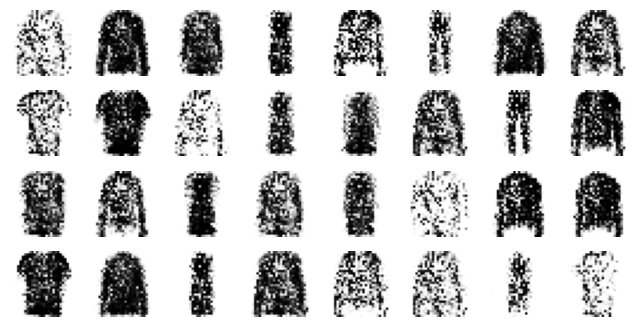

In [108]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

* 심층 합성곱 GAN (DCGAN)
    * (판별자에 있는) 풀링층을 스트라이드 합성곱으로 바꾸고, (생성자에 있는) 풀링 층은 전치 합성곱으로 바꾼다.
    * 생성자와 판별자에 배치 정규화 사용, 생성자의 출력층과 판별자의 입력층은 제외
    * 층을 깊게 쌓기 위해 완전 연결 은닉층 제거
    * tanh 함수를 사용해야 하는 출력층 제외하고, 생성자의 모든 층은 ReLU 활성화 함수 사용
    * 판별자의 모든 층은 LeakyReLU 함수 사용

In [109]:
codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"), # relu 대신 selu
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4), # 배치정규화 대신 드롭아웃 사용
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

C:\Users\knuyh\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [111]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [112]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

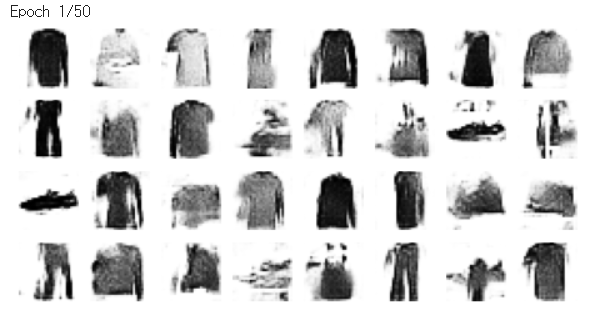

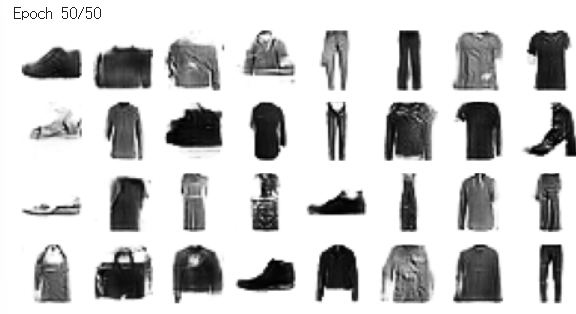

* DCGAN은 매우 큰 이미지를 생성하면 특징이 구분되지만, 전반적으로 일관성 없는 이미지를 얻을 가능성이 높다. (ex. 한쪽 소매가 더 긴 셔츠)  
**=> ProGAN**
* 훈련 초기에 작은 이미지 생성하고 점진적으로 생성자와 판별자에 합성곱 층을 추가해 갈수록 큰 이미지 생성